In [36]:
import numpy as np
import symforce

symforce.set_backend("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

from symforce import sympy as sm
from symforce import geo
from symforce import typing as T
from symforce.opt.factor import Factor
from symforce.opt.optimizer import Optimizer
from symforce.values import Values

from symforce.opt.barrier_functions import (
    min_max_power_barrier,
    min_max_linear_barrier,
    max_linear_barrier
)

import numpy as np
import matplotlib.pyplot as plt

In [83]:
t = sm.Symbol("t")
T_a = sm.Symbol("T_a")
v_0 = sm.Symbol("v_0")
a_0 = sm.Symbol("a_0")
v_A = sm.Symbol("v_A")
a_A = sm.Symbol("a_A")
l_a = sm.Symbol("l_a")


s_1 = sm.Symbol("s_1")
s_2 = sm.Symbol("s_2")
s_3 = sm.Symbol("s_3")
s_4 = sm.Symbol("s_4")
s_5 = sm.Symbol("s_5")

In [84]:
def velocity_function(current_time):
    # v_t = v_0 + s_1 * current_time + s_2 * current_time**2 +s_3 * current_time**3 + s_4 * current_time**4 + s_5 * current_time**5
    v_t = v_0 + s_1 * current_time + s_2 * current_time**2 +s_3 * current_time**3 + s_4 * current_time**4
    return v_t

def acc_function(current_time):
    tmp = sm.Symbol("tmp")
    return sm.diff(velocity_function(tmp), tmp).subs(tmp, current_time)

In [85]:
acc_function(t)

In [86]:
eq1 = sm.Eq(velocity_function(0), v_0)
eq2 = sm.Eq(velocity_function(T_a), v_A)
eq3 = sm.Eq(acc_function(0), a_0)
eq4 = sm.Eq(acc_function(T_a), a_A)
tmp = sm.Symbol("tmp")
eq5 = sm.Eq(sm.integrate(velocity_function(tmp), (tmp, 0, T_a)), l_a)

sol = sm.solve([eq1, eq2, eq3, eq4, eq5], [s_1, s_2, s_3, s_4, s_5])

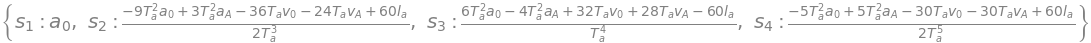

In [87]:
sol

In [88]:
def sol_velocity_function(current_time, arrival_time, initial_v, initial_a, arrival_v, arrival_a, drive_length):
    return velocity_function(current_time).subs([(s_1, sol[s_1]),
                                                 (s_2, sol[s_2]),
                                                 (s_3, sol[s_3]),
                                                 (s_4, sol[s_4]),
                                                 ]).subs([
        (v_0, initial_v),
        (a_0, initial_a),
        (v_A, arrival_v),
        (a_A, arrival_a),
        (T_a, arrival_time),
        (l_a, drive_length)
    ])

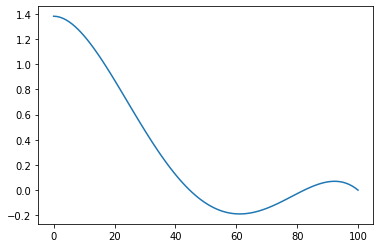

In [93]:
initial_speed = 1.38
initial_a = 0
arrival_speed = 0
arrival_a = -0.02
drive_length = 30
arrival_time = 100

# sol_velocity_function(1, arrival_time, initial_speed, initial_a, arrival_speed, arrival_a, drive_length)

opt_times = np.linspace(0, arrival_time, 100)
opt_v = [sol_velocity_function(ct, arrival_time, initial_speed, initial_a, arrival_speed, arrival_a, drive_length) for ct in opt_times]

plt.plot(opt_times, opt_v)